In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load all datasets
job_postings = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Desktop\job_postings.csv")
benefits = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\jobs\benefits.csv")
job_industries = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\jobs\job_industries.csv")
job_skills = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\jobs\job_skills.csv")
companies = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\companies\companies.csv")
employee_counts = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\companies\employee_counts.csv")
company_industries = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\companies\company_industries.csv")
company_specialities = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\companies\company_specialities.csv")
industries_mapping = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\mappings\industries.csv")
skills_mapping = pd.read_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\mappings\skills.csv")

In [60]:
# Merge job-related datasets
merged_jobs = pd.merge(job_postings, benefits, on='job_id', how='left')

# Merge company-related datasets
merged_companies = pd.merge(companies, employee_counts, on='company_id', how='left')

# Merge jobs with companies
comprehensive_data = pd.merge(merged_jobs, merged_companies, on='company_id', how='left')

# Merge with industries and skills-related data
comprehensive_data = pd.merge(comprehensive_data, job_industries, on='job_id', how='left')
comprehensive_data = pd.merge(comprehensive_data, industries_mapping, on='industry_id', how='left')
comprehensive_data = pd.merge(comprehensive_data, job_skills, on='job_id', how='left')
comprehensive_data = pd.merge(comprehensive_data, skills_mapping, on='skill_abr', how='left')

# Merge with company industries
comprehensive_data = pd.merge(comprehensive_data, company_industries, on='company_id', how='left')

# Remove duplicates
comprehensive_data = comprehensive_data.drop_duplicates()


comprehensive_data

,job_id,company_name,title,description_x,max_salary,pay_period,location,company_id,views,med_salary,...,address,url,employee_count,follower_count,time_recorded,industry_id,industry_name,skill_abr,skill_name,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09,44.0,Real Estate,MRKT,Marketing,Real Estate
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09,44.0,Real Estate,SALE,Sales,Real Estate
2,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCPR,Health Care Provider,NaN
3,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09,32.0,Restaurants,MGMT,Management,Restaurants
4,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09,32.0,Restaurants,MNFC,Manufacturing,Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309882,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,Eagle Way,https://www.linkedin.com/company/trelleborg-ap...,47.0,3791.0,1.713573e+09,135.0,Industrial Machinery Manufacturing,SALE,Sales,Industrial Machinery Manufacturing
1309883,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,862.0,79661.0,1.712377e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting
1309884,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,875.0,81300.0,1.713214e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting
1309885,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,874.0,81918.0,1.713395e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting


In [4]:
missing_data = comprehensive_data.isnull().sum()

significant_missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)
significant_missing_columns

closed_time                   1305027
skills_desc                   1294548
med_salary                    1248433
remote_allowed                1163023
applies                       1047160
max_salary                     933071
min_salary                     933071
pay_period                     871617
normalized_salary              871617
compensation_type              871617
currency                       871617
inferred                       765864
type                           765864
posting_domain                 439259
application_url                384181
fips                           288216
formatted_experience_level     280142
zip_code_x                     217326
company_size                    28227
views                           17746
description_y                   10835
zip_code_y                       6492
industry                         5218
address                          4350
state                            4316
name                             4204
city        

In [5]:
# Use "Not Specified" for categorical columns with missing values
cols_fill_not_specified = ['skills_desc', 'type', 'pay_period', 'currency', 'compensation_type', 'posting_domain',
                           'application_url', 'formatted_experience_level', 'company_size', 'zip_code_y', 'address',
                           'state', 'url', 'city', 'country', 'name', 'skill_abr', 'skill_name', 'industry_name', 'industry_id']
for col in cols_fill_not_specified:
    comprehensive_data.fillna({col:"Not Specified"}, inplace=True)

# Use "Not Specified" for company description
comprehensive_data.fillna({'description_y':"Not Specified"}, inplace=True)


# Fill numerical columns with zeros
cols_fill_zero = ['applies', 'views', 'follower_count', 'employee_count']
for col in cols_fill_zero:
    comprehensive_data.fillna({col:0}, inplace=True)

# Fill remote_allowed with "Unknown"
comprehensive_data.fillna({"remote_allowed":"Unknown"}, inplace=True)

comprehensive_data.fillna({'closed_time':"Still Open"}, inplace=True)

# Use "Unknown" for inferred
comprehensive_data.fillna({'inferred':"Unknown"}, inplace=True)

# Fill missing job descriptions
comprehensive_data.fillna({'description_x':"Not Specified"}, inplace=True)

comprehensive_data

comprehensive_data

,job_id,company_name,title,description_x,max_salary,pay_period,location,company_id,views,med_salary,...,address,url,employee_count,follower_count,time_recorded,industry_id,industry_name,skill_abr,skill_name,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09,44.0,Real Estate,MRKT,Marketing,Real Estate
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09,44.0,Real Estate,SALE,Sales,Real Estate
2,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,Not Specified,Not Specified,0.0,0.0,NaN,Not Specified,Not Specified,HCPR,Health Care Provider,NaN
3,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09,32.0,Restaurants,MGMT,Management,Restaurants
4,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09,32.0,Restaurants,MNFC,Manufacturing,Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309882,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,Not Specified,"Texas, United States",2793699.0,4.0,NaN,...,Eagle Way,https://www.linkedin.com/company/trelleborg-ap...,47.0,3791.0,1.713573e+09,135.0,Industrial Machinery Manufacturing,SALE,Sales,Industrial Machinery Manufacturing
1309883,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,862.0,79661.0,1.712377e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting
1309884,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,875.0,81300.0,1.713214e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting
1309885,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,601 Valencia Ave,https://www.linkedin.com/company/solugenix,874.0,81918.0,1.713395e+09,25.0,Manufacturing,MRKT,Marketing,IT Services and IT Consulting


In [6]:
linkedin_cleaned_data = comprehensive_data.drop_duplicates()

# Shape of the cleaned data
linkedin_cleaned_data.shape

(1309887, 50)

In [7]:
linkedin_cleaned_data.to_csv(r"C:\Users\Atharva Abhang\OneDrive\Documents\AA\linkedin_cleaned_data3.csv", index=False)

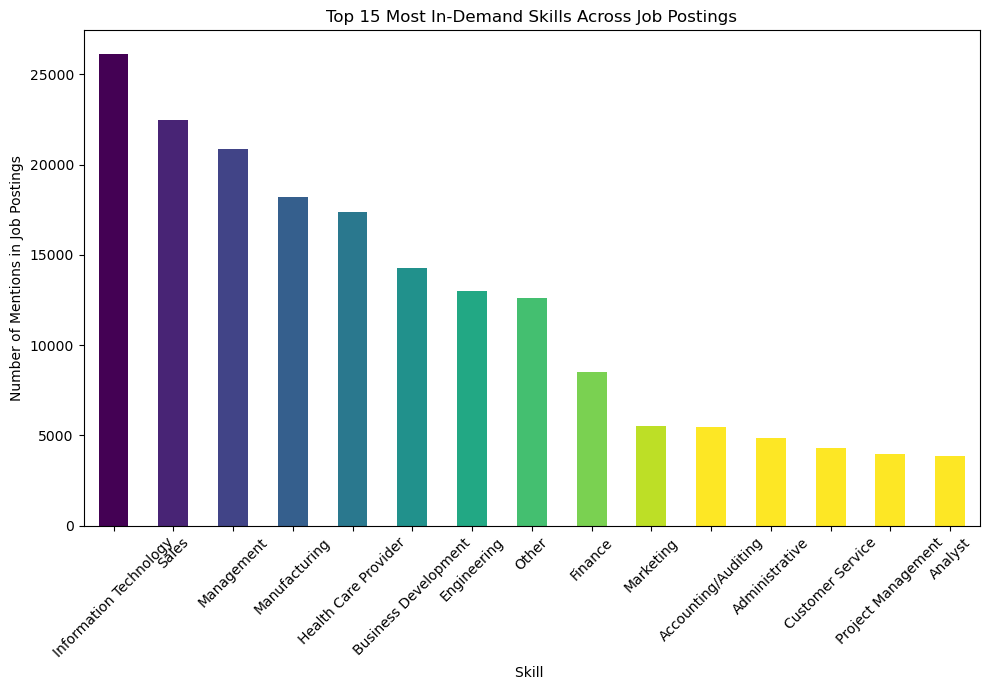

In [50]:
#Top 15 Most In-Demand Skills Across Job Postings

skills = pd.merge(job_skills, skills_mapping, on='skill_abr', how='left')
top_skills = skills['skill_name'].value_counts().head(15)
top_companies = linkedin_cleaned_data['name'].value_counts().head(10)


#Plot with colormaps
from matplotlib import colormaps
cmap = colormaps['viridis'] 
colors = [cmap(i / len(top_companies)) for i in range(len(top_skills))]


plt.figure(figsize=(10, 7))
top_skills.plot(kind='bar', color=colors)
plt.title('Top 15 Most In-Demand Skills Across Job Postings')
plt.xlabel('Skill ')
plt.ylabel('Number of Mentions in Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

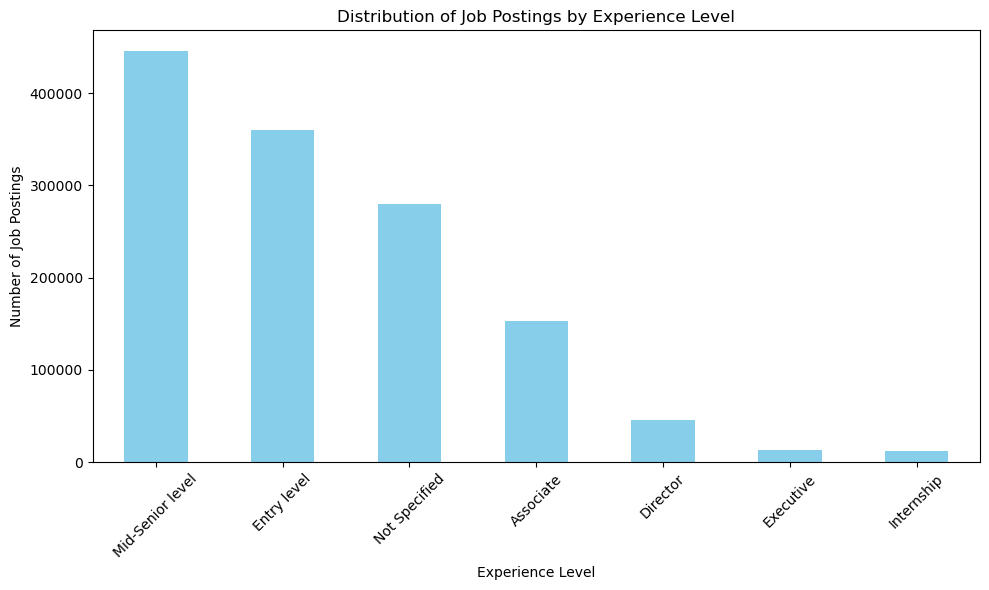

In [48]:
# Distribution of job postings by experience level
experience_level_distribution = linkedin_cleaned_data['formatted_experience_level'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
experience_level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Postings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


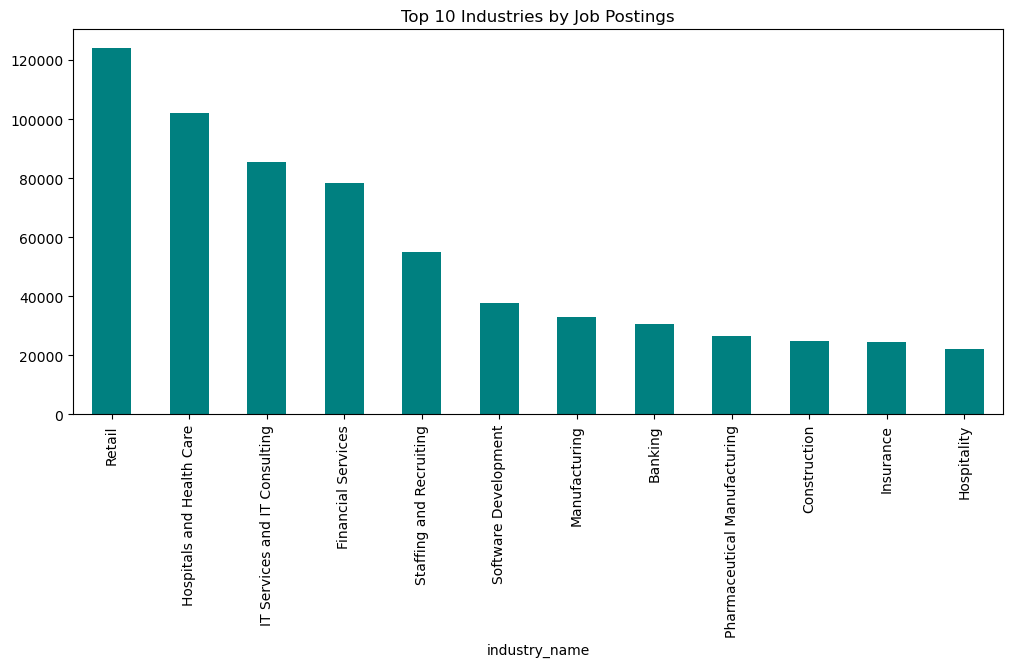

In [46]:
#Top 10 Industries by Job Postings
comprehensive_data_with_industries = pd.merge(linkedin_cleaned_data, company_industries, on='company_id', how='left')
industry_count = comprehensive_data_with_industries['industry_name'].value_counts().head(12)

#Plotting
industry_count.plot(kind='bar', figsize =(12,5) ,color= 'teal' ,title='Top 10 Industries by Job Postings')
plt.show()

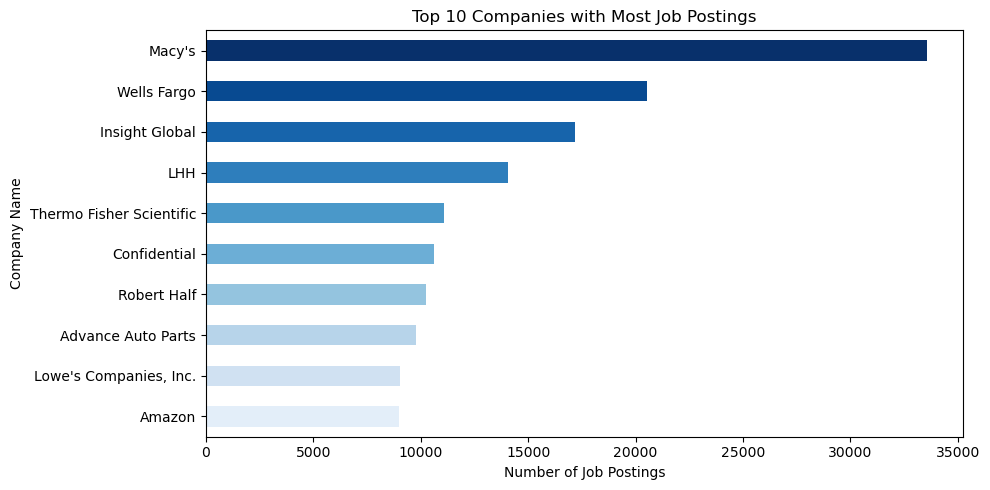

In [11]:
# Top companies with the most job postings
top_companies = linkedin_cleaned_data['name'].value_counts().head(10)
from matplotlib import colormaps

# Plot with the colormap
cmap = colormaps['Blues_r'] 
colors = [cmap(i / len(top_companies)) for i in range(len(top_companies))]

plt.figure(figsize=(10, 5))
top_companies.plot(kind='barh', color=colors)
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.gca().invert_yaxis()  # Display the highest value at the top
plt.tight_layout()
plt.show()

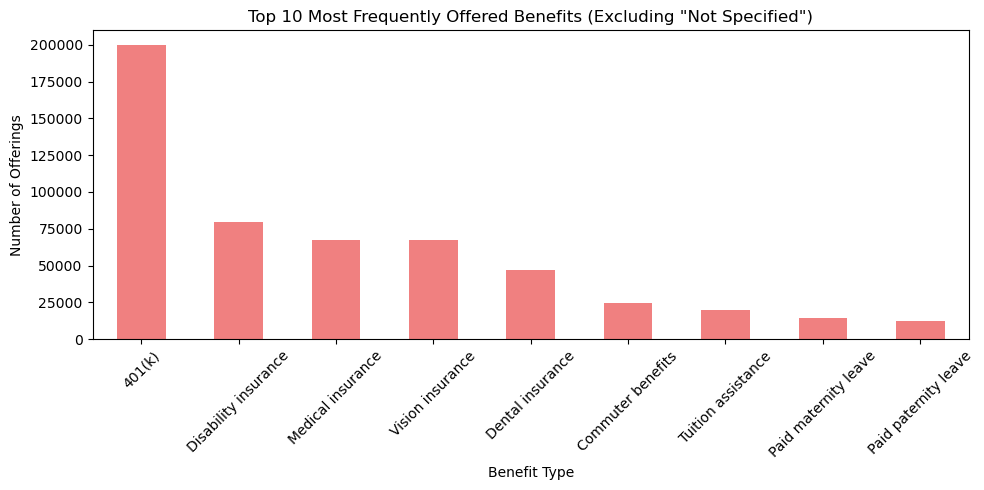

In [42]:
# Top 10 Most Frequently Offered Benefits

#Filter out 'Not Specified' from the data
top_benefits =linkedin_cleaned_data['type'].value_counts().head(10)
top_benefits = top_benefits[top_benefits.index != 'Not Specified']

#Plotting
plt.figure(figsize=(10, 5))
top_benefits.plot(kind='bar', color='lightcoral')  
plt.title('Top 10 Most Frequently Offered Benefits (Excluding "Not Specified")')
plt.xlabel('Benefit Type')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

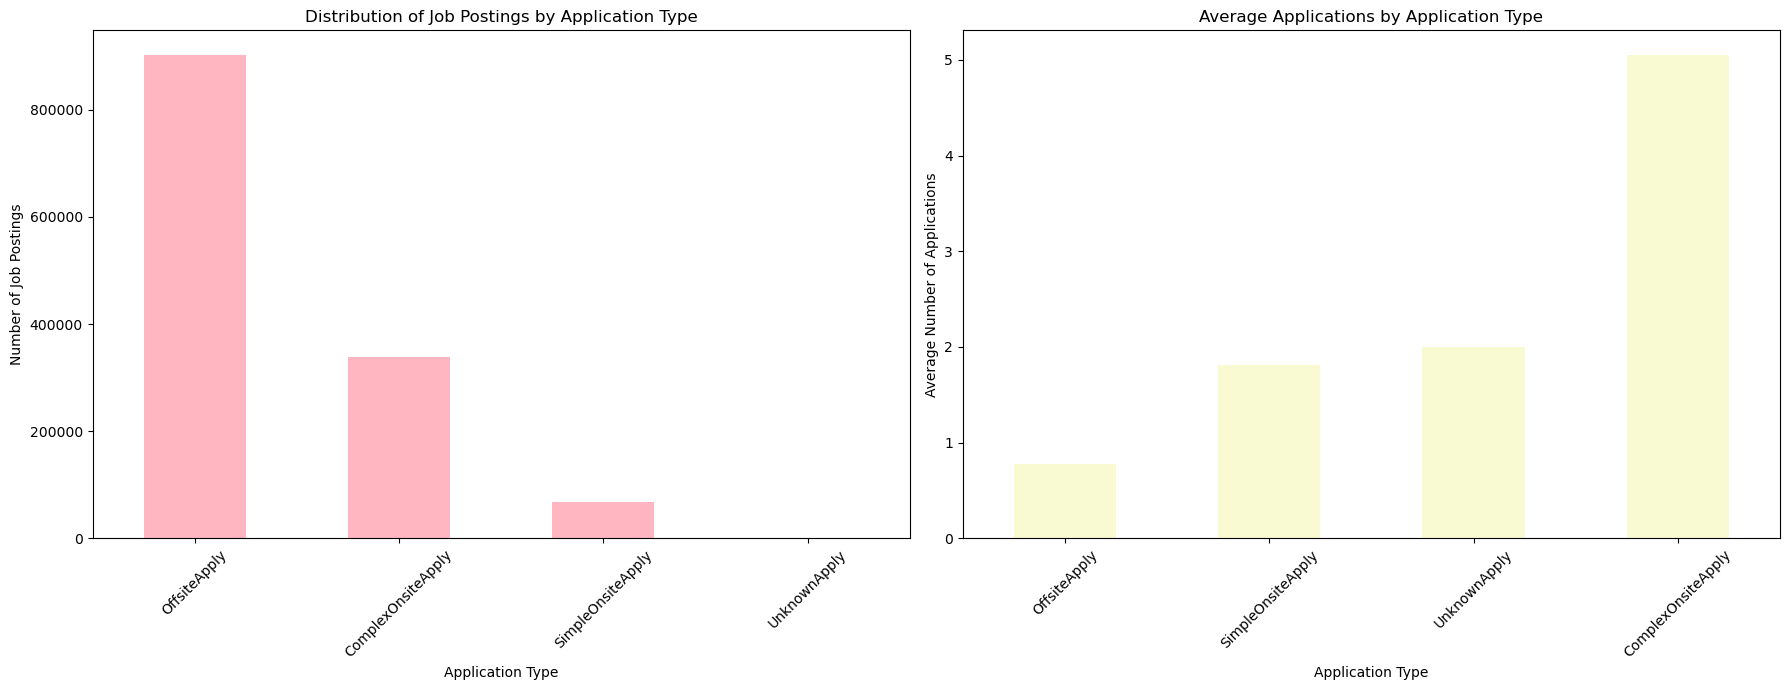

In [13]:
# Distribution of job postings by application type
app_type_distribution = linkedin_cleaned_data['application_type'].value_counts()

# Correlation between application type and number of applications
average_applies_by_app_type = linkedin_cleaned_data.groupby('application_type')['applies'].mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Application Type
app_type_distribution.plot(kind='bar', color='lightpink', ax=ax1)
ax1.set_title('Distribution of Job Postings by Application Type')
ax1.set_xlabel('Application Type')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Average Applications by Application Type
average_applies_by_app_type.sort_values().plot(kind='bar', color='lightgoldenrodyellow', ax=ax2)
ax2.set_title('Average Applications by Application Type')
ax2.set_xlabel('Application Type')
ax2.set_ylabel('Average Number of Applications')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

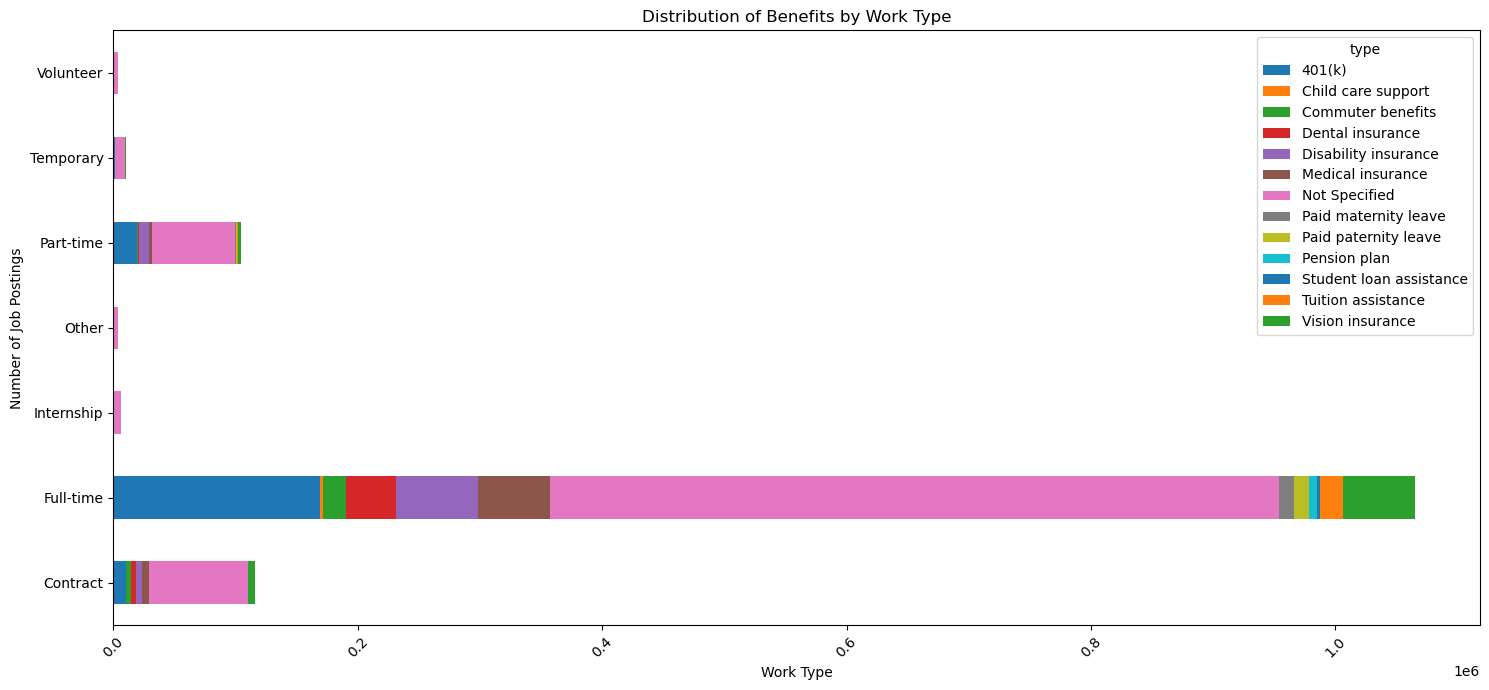

In [14]:
# Distribution of benefits based on work type using the correct column name
benefits_by_worktype = linkedin_cleaned_data.groupby(['formatted_work_type', 'type']).size().unstack()

# Plotting
benefits_by_worktype.plot(kind='barh', stacked=True, figsize=(15, 7))
plt.title('Distribution of Benefits by Work Type')
plt.ylabel('Number of Job Postings')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
#Count of job postings by country
country_counts = linkedin_cleaned_data['country'].value_counts()
country_counts = country_counts[country_counts > 100]

print(country_counts)


country
US               1161066
GB                 41581
0                  28213
CA                 13973
IN                  9798
CH                  8250
FR                  7820
DE                  5930
OO                  5313
SE                  5196
Not Specified       4201
NO                  3843
NL                  2353
DK                  2222
IT                  2036
JP                  1570
IE                  1318
BE                  1168
AU                   861
CN                   497
ES                   337
AE                   282
FI                   250
SG                   248
IL                   245
AT                   178
LU                   156
MX                   141
TW                   126
Name: count, dtype: int64


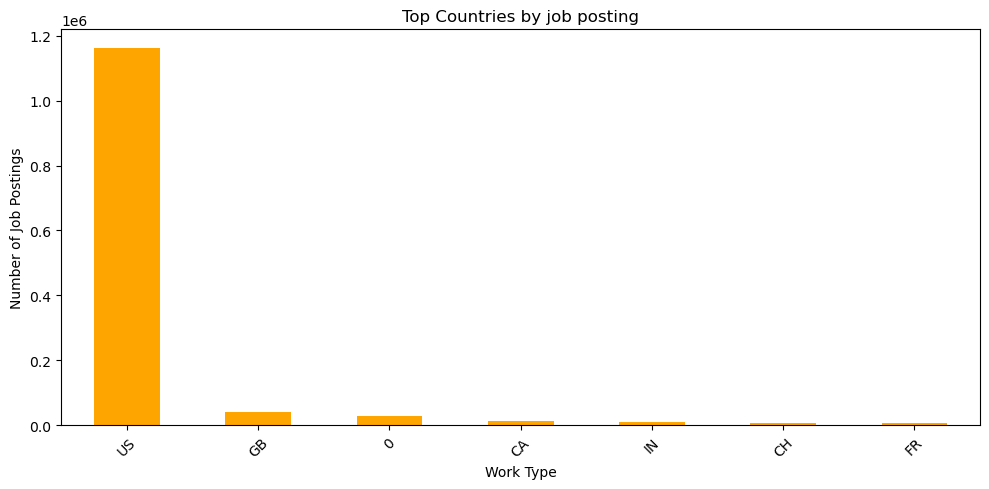

In [40]:
# Top countries by job postings

country_counts = linkedin_cleaned_data['country'].value_counts().head(7)
country_counts = country_counts[country_counts > 100]

country_counts.plot(kind='bar', figsize=(10, 5) , color='Orange')
plt.title('Top Countries by job posting')
plt.ylabel('Number of Job Postings')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
